### import libraries

In [1]:
import pip

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sweetviz as sv
import dtale
import warnings
import logging
import numpy as np

# Ignore all warnings
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.WARNING)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

ModuleNotFoundError: No module named 'matplotlib'

### read dataset

In [3]:
df = (pd.read_csv("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\hotel_prices.csv", sep=";"))
df.head()

,Date,Destination,Night Price($),Hotel Name,Address,Amenities
0,1/1/2024,Los Angeles,273,Null,Null,Null
1,2/1/2024,Los Angeles,205,Null,Null,Null
2,3/1/2024,Los Angeles,228,Null,Null,Null
3,4/1/2024,Los Angeles,205,Null,Null,Null
4,5/1/2024,Los Angeles,181,Null,Null,Null


### EDA

In [4]:
# delete columns that have no data
df = (
    pd.read_csv("D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\hotel_prices.csv", sep=";")
    .drop(["Address", "Amenities", "Hotel Name"], axis=1)
    )
df.head(62)

,Date,Destination,Night Price($)
0,1/1/2024,Los Angeles,273
1,2/1/2024,Los Angeles,205
2,3/1/2024,Los Angeles,228
3,4/1/2024,Los Angeles,205
4,5/1/2024,Los Angeles,181
...,...,...,...
57,27-01-2024,San Francisco,240
58,28-01-2024,San Francisco,277
59,29-01-2024,San Francisco,202
60,30-01-2024,San Francisco,205


In [5]:
# Function to normalize date formats
def normalize_date(date_str):
    if isinstance(date_str, str):
        # Replace slashes with dashes
        date_str = date_str.replace('/', '-')
    return date_str

def convert_to_dd_mm_yyyy(date_str):
    try:
        return datetime.strptime(date_str, "%d-%m-%Y").strftime("%Y-%m-%d")
    except ValueError:
        return date_str

# Apply normalization to the 'Date' column
if 'Date' in df.columns:
    df['Date'] = df['Date'].apply(normalize_date)
    df['Date'] = df['Date'].apply(convert_to_dd_mm_yyyy)

def format_ok(date_str):
    try:
        return datetime.strptime(date_str, "%d-%m-%Y").strftime("%Y-%m-%d")
    except ValueError:
        return date_str

if 'Date' in df.columns:
    df['Date'] = df['Date'].apply(format_ok)

# Save the cleaned dataset
cleaned_file_path = 'D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\cleaned_hotel_prices.csv'
df.to_csv(cleaned_file_path, index=False)

# Display the first few rows to verify the changes
df.head(30)


,Date,Destination,Night Price($)
0,2024-01-01,Los Angeles,273
1,2024-01-02,Los Angeles,205
2,2024-01-03,Los Angeles,228
3,2024-01-04,Los Angeles,205
4,2024-01-05,Los Angeles,181
5,2024-01-06,Los Angeles,224
6,2024-01-07,Los Angeles,267
7,2024-01-08,Los Angeles,233
8,2024-01-09,Los Angeles,244
9,2024-01-10,Los Angeles,234


In [6]:
# delete duplicate data
df = df.drop_duplicates(subset=['Date','Destination'], keep='first')
df

,Date,Destination,Night Price($)
0,2024-01-01,Los Angeles,273
1,2024-01-02,Los Angeles,205
2,2024-01-03,Los Angeles,228
3,2024-01-04,Los Angeles,205
4,2024-01-05,Los Angeles,181
...,...,...,...
299,2024-05-27,San Francisco,106
300,2024-05-28,San Francisco,132
301,2024-05-29,San Francisco,224
302,2024-05-30,San Francisco,215


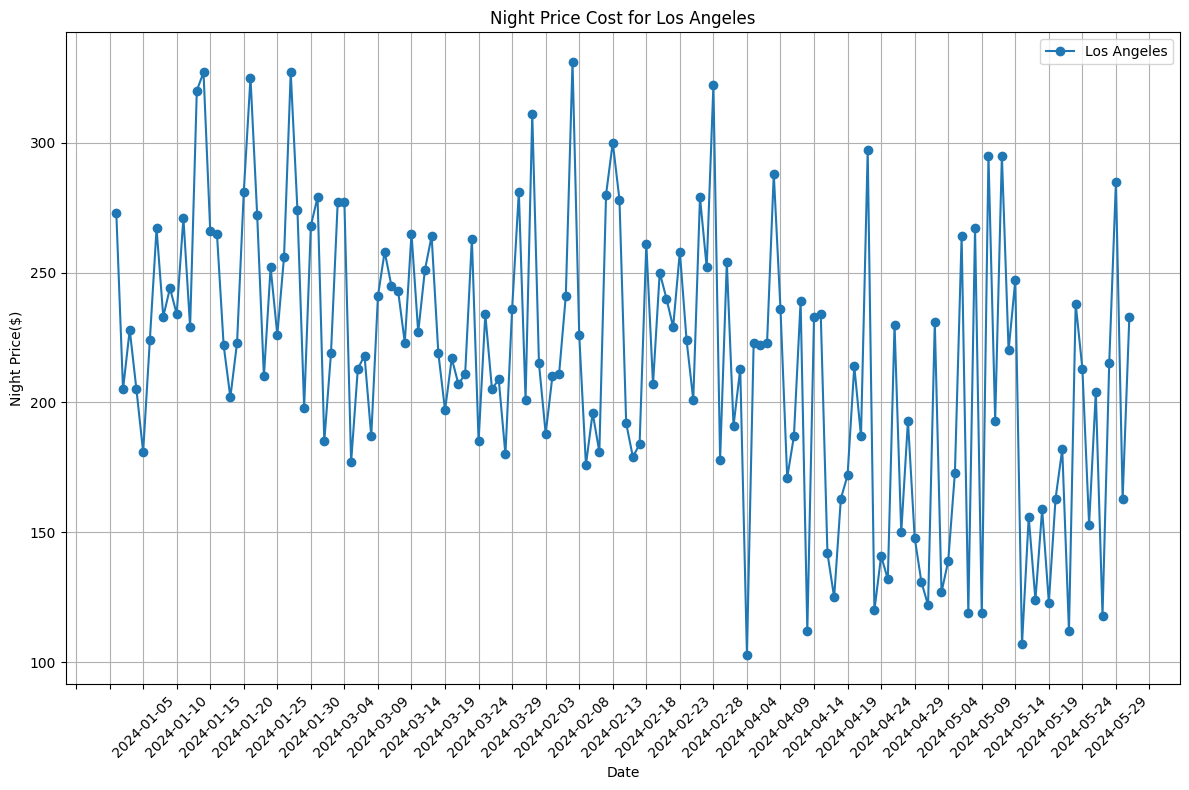

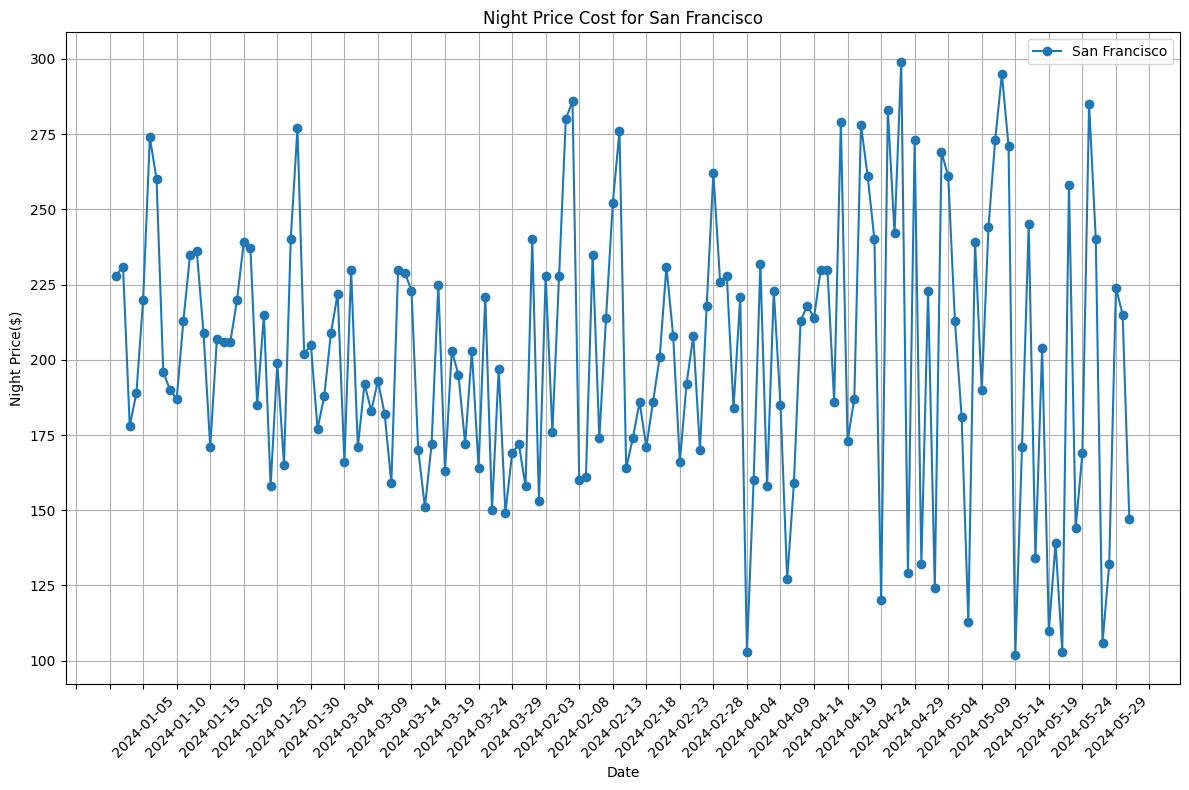

In [7]:
# List of unique destinations
unique_destinations = df['Destination'].unique()

# Create graphs for each destination
for destination in unique_destinations:
    destination_data = df[df['Destination'] == destination]
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(destination_data.Date, destination_data['Night Price($)'], marker='o', label=destination)
    
    plt.title(f'Night Price Cost for {destination}')
    plt.xlabel('Date')
    plt.ylabel('Night Price($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

    # Set x-axis major locator to show every 5th date
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    
    plt.tight_layout()
    plt.show()

In [8]:
# Convert destination names to numerical identifiers
df['Destination'] = df['Destination'].astype('category')
df['Destination_ID'] = df['Destination'].cat.codes
# file = file.drop('Destination', axis=1)
df.to_csv('D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\data_training.csv', index=False)

                Night Price($)  Destination_ID
Night Price($)        1.000000       -0.163215
Destination_ID       -0.163215        1.000000


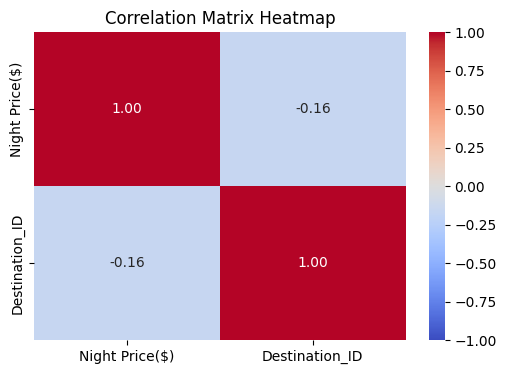

In [9]:
from pandas.plotting import scatter_matrix

# Load the dataset
file_path = 'D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\data_training.csv'
df = pd.read_csv(file_path)

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Sweetviz: 
### Sweetviz creates a comprehensive report and is known for its visually appealing output.

In [10]:
# Sweetviz report
df = pd.read_csv('D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\cleaned_hotel_prices.csv')
report = sv.analyze(df)
report.show_html('report.html')  # This will generate an HTML report


Feature: Date                                |██▌       | [ 25%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# DTale: 
### DTale provides a Flask app interface for interacting with pandas dataframes, offering a wide range of EDA features.

In [11]:
# Load the dataset
df = pd.read_csv('D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\cleaned_hotel_prices.csv')

# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Drop the 'Date' column
df = df.drop(["Date"], axis=1)

# Display the DataFrame using D-Tale
dtale.show(df)

## Autoviz: 
### Autoviz is designed to visualize any dataset automatically.

In [12]:
# read and display dataset
df = pd.read_csv('D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\data_training.csv')
df

,Date,Destination,Night Price($),Destination_ID
0,2024-01-01,Los Angeles,273,0
1,2024-01-02,Los Angeles,205,0
2,2024-01-03,Los Angeles,228,0
3,2024-01-04,Los Angeles,205,0
4,2024-01-05,Los Angeles,181,0
...,...,...,...,...
299,2024-05-27,San Francisco,106,1
300,2024-05-28,San Francisco,132,1
301,2024-05-29,San Francisco,224,1
302,2024-05-30,San Francisco,215,1


In [13]:
# Agregar un año de datos retrasados
df['L1'] = df["Night Price($)"].shift(1)
df['L2'] = df["Night Price($)"].shift(2)
df['L3'] = df["Night Price($)"].shift(3)
df['L4'] = df["Night Price($)"].shift(4)
df['L5'] = df["Night Price($)"].shift(5)
df['L6'] = df["Night Price($)"].shift(6)
df['L7'] = df["Night Price($)"].shift(7)
df['L8'] = df["Night Price($)"].shift(8)
df['L9'] = df["Night Price($)"].shift(9)
df['L10'] = df["Night Price($)"].shift(10)
df['L11'] = df["Night Price($)"].shift(11)
df['L12'] = df["Night Price($)"].shift(12)

In [14]:
df_clean = df.dropna()
df_clean

,Date,Destination,Night Price($),Destination_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
12,2024-01-13,Los Angeles,320,0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0,205.0,273.0
13,2024-01-14,Los Angeles,327,0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0,205.0
14,2024-01-15,Los Angeles,266,0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0
15,2024-01-16,Los Angeles,265,0,266.0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0
16,2024-01-17,Los Angeles,222,0,265.0,266.0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2024-05-27,San Francisco,106,1,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0,171.0
300,2024-05-28,San Francisco,132,1,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0
301,2024-05-29,San Francisco,224,1,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0
302,2024-05-30,San Francisco,215,1,224.0,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0


In [15]:
# Sort the DataFrame by index
df.sort_index(inplace=True)
df

,Date,Destination,Night Price($),Destination_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
0,2024-01-01,Los Angeles,273,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,Los Angeles,205,0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,Los Angeles,228,0,205.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,Los Angeles,205,0,228.0,205.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Los Angeles,181,0,205.0,228.0,205.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2024-05-27,San Francisco,106,1,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0,171.0
300,2024-05-28,San Francisco,132,1,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0
301,2024-05-29,San Francisco,224,1,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0
302,2024-05-30,San Francisco,215,1,224.0,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0


In [16]:
# make a copy of the clean dataset
df=df_clean.copy()
df.reset_index(drop=True, inplace=True)
df

,Date,Destination,Night Price($),Destination_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12
0,2024-01-13,Los Angeles,320,0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0,205.0,273.0
1,2024-01-14,Los Angeles,327,0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0,205.0
2,2024-01-15,Los Angeles,266,0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0,228.0
3,2024-01-16,Los Angeles,265,0,266.0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0,205.0
4,2024-01-17,Los Angeles,222,0,265.0,266.0,327.0,320.0,229.0,271.0,234.0,244.0,233.0,267.0,224.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024-05-27,San Francisco,106,1,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0,171.0
288,2024-05-28,San Francisco,132,1,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0,245.0
289,2024-05-29,San Francisco,224,1,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0,134.0
290,2024-05-30,San Francisco,215,1,224.0,132.0,106.0,240.0,285.0,169.0,144.0,258.0,103.0,139.0,110.0,204.0


In [17]:
# Display the DataFrame using D-Tale
dtale.show(df)

In [18]:
df.to_csv('D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Gestion Estrategica\what-if\ML\data\data_ok.csv', index=False)

# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [19]:
pip uninstall -y pydantic pydantic-core pycaret

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --user pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached pyod-2.0.0-py3-none-any.whl
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached jsonschema-4.22.0-py3-none-any.whl.metadata (8.2 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
Using cached nbformat-5.10

In [23]:
pip install --user pycaret[analysis]

  Using cached shap-0.44.1.tar.gz (1.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached interpret-0.6.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached PyYAML-6.0.1-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata (20 kB)
  Using cached explainerdashboard-0.4.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached fairlearn-0.7.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached dash_auth-2.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached dtreeviz-2.2.2-py3-no

  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [177 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      The nvcc binary could not be located in your $PATH. Either add it to your path, or set $CUDAHOME to enable CUDA.
      Exception occurred during setup, Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      Retrying SHAP build without cuda extension...
      Attempting to build SHAP: with_binary=True, with_cuda=False (Attempt 2)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\shap
      copying shap\datasets.py -> build\lib.win-amd64-cpython-312\shap
      copying shap\links.py -> build\lib.win-amd64-cpython-312\shap
      copying shap\_explanation.py -> build\lib.win-amd64-cpython-

In [25]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

In [ ]:
# check the type of exp
type(exp)

## Analyze Model

In [ ]:
from pycaret.regression import *

# Set up the environment and load the data, make sure to set index=False
reg = setup(data=df, target='Night Price($)', categorical_features=['Destination_ID'])

# Group the dataset by Destination_ID
grouped = df.groupby('Destination_ID')

# Define a function to train models for each group
def train_models(group):
    reg = setup(data=group.reset_index(drop=True), target='Night Price($)')
    best_model = compare_models()
    return best_model

# Train models for each group
models_by_group = grouped.apply(train_models)

predictions_by_group = {}
for group_id, group_data in grouped:
    model = models_by_group[group_id]
    X = group_data.drop(columns=['Night Price($)'])  # Exclude the target variable column
    y = group_data['Night Price($)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    predictions = predict_model(model, data=X_test)
    predictions_by_group[group_id] = predictions

# Display predictions for each group
for group_id, predictions in predictions_by_group.items():
    print(f"Predicciones para Destination_ID {group_id}:")
    print(predictions)


In [ ]:
# predict on test set
holdout_pred = predict_model(model)

In [ ]:
# Plot the training, test data, and predictions for each group
for group_id, group_data in grouped:
    plt.figure(figsize=(10, 6))
    
    # Plot the training data
    plt.plot(group_data['Date'], group_data['Night Price($)'], label='X_train', color='blue')
    
    # Get the index range corresponding to the test set
    test_index_range = range(int(len(group_data) * 0.7), len(group_data))
    
    # Plot the test data
    plt.plot(group_data.iloc[test_index_range]['Date'], group_data.iloc[test_index_range]['Night Price($)'], label='y_test', color='green')
    
    # Get the predictions
    predictions = predictions_by_group[group_id]
    
    # Check the columns present in the predictions
    print(predictions.columns)
    
    # Use the appropriate prediction column
    plt.plot(group_data.iloc[test_index_range]['Date'], predictions['prediction_label'], label='Predictions', color='red')
    
    plt.title(f"Destination_ID {group_id} - Night Price($)")
    plt.xlabel("Time")
    plt.ylabel("Night Price($)")
    plt.legend()
    plt.grid(True)
    
    # Format the x-axis to display every 5 days
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.xticks(rotation=45)
    
    plt.show()


In [ ]:
from pycaret.regression import save_model

# Guardar el mejor modelo entrenado
save_model(model, 'mejor_modelo_regresion')